In [ ]:
# !pip install featexp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
"""
Please download methods.py 
from https://drive.google.com/file/d/12tC3SOtcZUZCDdGnz-pk0X_uj044styJ/view?usp=sharing
before import
"""

'\nPlease download methods.py \nfrom https://drive.google.com/file/d/12tC3SOtcZUZCDdGnz-pk0X_uj044styJ/view?usp=sharing\nbefore import\n'

In [ ]:
import numpy as np
import pandas as pd
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns
import featexp
import methods
from sklearn.feature_selection import VarianceThreshold
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

RAND = 10

Mounted at /content/drive


 # Необходимо спрогнозировать академические задолженности у студентов с точностью до дисциплины и придумать, как с помощью данных решить глобальные вызовы образования. Метрика качества - F1-score.
Описание данных:

ISU - идентификатор студента

ST_YEAR - год обучения

SEMESTER - семестр обучения

DISC_ID - код дисциплины

TYPE_NAME - тип контроля

DEBT - Академическая задолженность (1 есть долг, 0 нет долга)

MARK - результат контроля

MAIN_PLAN - образовательный план в данный промежуток времени

PRED_ID - UID преподавателя

СHOICE - выборность дисциплины

DISC_NAME - название дисциплины

DISC_DEP - факультет-реализатор дисциплины

mean_MARK - средняя оценка выставленная преподавателем по этой дисциплине

STUD_GENDER - пол студента

CITIZENSHIP - гражданство

EXAM_TYPE - форма зачисления (ЕГЭ, олимпиада, ВИ - вступительные испытания)

EXAM_SUBJECT_1 - первый экзамен ЕГЭ

EXAM_SUBJECT_2 - второй экзамен ЕГЭ

EXAM_SUBJECT_3 - третий экзамен ЕГЭ

ADMITTED_EXAM_1 - баллы за 1 экзамен ЕГЭ

ADMITTED_EXAM_2 - баллы за 2 экзамен ЕГЭ

ADMITTED_EXAM_3 - баллы за 3 экзамен ЕГЭ

ADMITTED_SUBJECT_PRIZE_LEVEL - уровень олимпиады (если есть)

REGION_ID - номер региона

KURS - курс обучения, которому соответствует запись

PRIZNAK - состояние на конец периода обучения (обучен, академ, отчислен)

Trainig_period - время обучения


# Load Data

In [ ]:
train = feather.read_feather(
    '/content/drive/MyDrive/Colab Notebooks/Pet_project/Processed data/train.feather'
)

In [ ]:
train[:3]

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT,MARK,MAIN_PLAN,PRED_ID,СHOICE,...,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID,KURS,PRIZNAK,Training_period
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0,зачет,4664712865904477750,5087927234000983963,0,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65
1,17623928044460629977,2020,1,10502311854018326223,Зачет,0,зачет,4664712865904477750,5087927234000983963,0,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,академ,298
2,17623928044460629977,2020,1,1601392918367593206,Зачет,0,зачет,4664712865904477750,5087927234000983963,0,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   ISU                           357448 non-null  object
 1   ST_YEAR                       357448 non-null  int16 
 2   SEMESTER                      357448 non-null  int16 
 3   DISC_ID                       357448 non-null  object
 4   TYPE_NAME                     357448 non-null  object
 5   DEBT                          357448 non-null  int16 
 6   MARK                          357448 non-null  object
 7   MAIN_PLAN                     357448 non-null  object
 8   PRED_ID                       357448 non-null  object
 9   СHOICE                        357448 non-null  int16 
 10  DISC_NAME                     357448 non-null  object
 11  DISC_DEP                      357448 non-null  object
 12  mean_MARK                     357448 non-null  int16 
 13 

In [ ]:
train.describe()

,ST_YEAR,SEMESTER,DEBT,СHOICE,mean_MARK,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,KURS,Training_period
count,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000,357448.000000
mean,2019.312101,2.519441,0.050637,0.280902,3.140034,80.278351,81.835523,86.087101,1.589532,252.850661
std,0.752997,1.505134,0.219255,0.449590,0.357138,9.552118,15.038353,8.795528,0.704434,136.557337
min,2018.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2019.000000,1.000000,0.000000,0.000000,3.000000,74.000000,79.000000,82.000000,1.000000,134.000000
50%,2019.000000,2.000000,0.000000,0.000000,3.000000,80.000000,81.000000,85.000000,1.000000,363.000000
75%,2020.000000,3.000000,0.000000,1.000000,3.000000,84.000000,90.000000,94.000000,2.000000,364.000000
max,2020.000000,6.000000,1.000000,3.000000,5.000000,100.000000,100.000000,100.000000,4.000000,672.000000


In [ ]:
train.describe(include='object')

,ISU,DISC_ID,TYPE_NAME,MARK,MAIN_PLAN,PRED_ID,DISC_NAME,DISC_DEP,STUD_GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID,PRIZNAK
count,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448
unique,4980,943,4,8,132,712,556,26,2,11,3,6,8,5,6,85,3
top,2506248507643047858,9028324525774925341,Зачет,зачет,5702036724245840580,5087927234000983963,Иностранный язык,16131140458546037814,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,ЕГЭ,4877310761925081124,обучен
freq,470,32540,181941,172776,21814,105498,44904,56360,252297,344426,277269,352976,269774,342879,263553,116669,343736


# MARK
**Можно предположить, что наличие долгов у субъектов должно зависеть от оценки, ведь если оценка низкая, то возникает долг. Давайте проверим это.**

In [ ]:
train['MARK'].unique()

array(['зачет', '3', '4', 'незач', '5', '2', 'неявка', 'осв'],
      dtype=object)

In [ ]:
# Приведем все значения оценок к числовому виду
train['MARK'] = train.apply(lambda x: methods.change_mark(x['MARK']), axis=1)

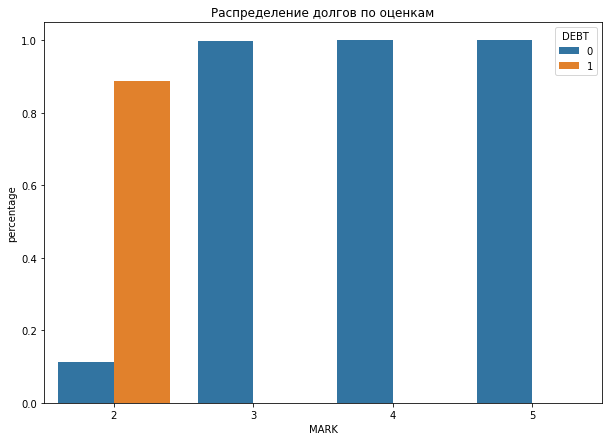

In [ ]:
# посмотрим как распределены долги по оценкам.
target = train.groupby('MARK')['DEBT'].value_counts(
    normalize=True).rename('percentage').reset_index()
    
plt.figure(figsize=(10,7))
sns.barplot(x='MARK', y='percentage', data=target, hue='DEBT')
plt.title('Распределение долгов по оценкам');

**Мы видим, что MARK очень хорошо разделяет наши данные. Это позволит модели очень точно решать задачу, практически не учитывая другие признаки. В общем, не стоит использовать такой очевидный способ, чтобы модель показывала высокие показатели. Это определенный лик в данных и это затрудняет понимание влияния других признаков на результат. Поэтому удалим его.**

In [ ]:
del train['MARK']

In [ ]:
train[:3]

,ISU,ST_YEAR,SEMESTER,DISC_ID,TYPE_NAME,DEBT,MAIN_PLAN,PRED_ID,СHOICE,DISC_NAME,...,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID,KURS,PRIZNAK,Training_period
0,17623928044460629977,2020,1,10502311854018326223,Зачет,0,4664712865904477750,5087927234000983963,0,Введение в профессиональную деятельность,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65
1,17623928044460629977,2020,1,10502311854018326223,Зачет,0,4664712865904477750,5087927234000983963,0,Введение в профессиональную деятельность,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,академ,298
2,17623928044460629977,2020,1,1601392918367593206,Зачет,0,4664712865904477750,5087927234000983963,0,Введение в цифровую культуру,...,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65


# Балланс классов

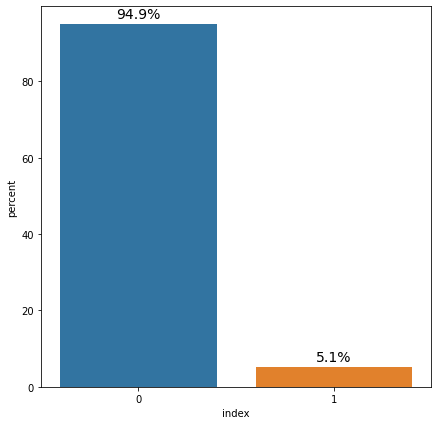

In [ ]:
# проверим балланс классов
target = train['DEBT'].value_counts(
    normalize=True).mul(100).rename('percent').reset_index()

plt.figure(figsize=(7,7))
ax = sns.barplot(x='index', y='percent', data=target)
methods.plot_text(ax)

**Мы видим серьзный дисбалланс классов**

# Проверка зависимостей цели от признаков

In [ ]:
# посмотрим распределение отношения колва студентов с долгами к общему числу студентов
# по каждому признаку. Для этого переведем категориальные признаки в лейблы
df = train.copy()

for i in df.select_dtypes(include='object'):
    df[i] = df[i].astype('category').cat.codes

                                            Plots for ISU                                             


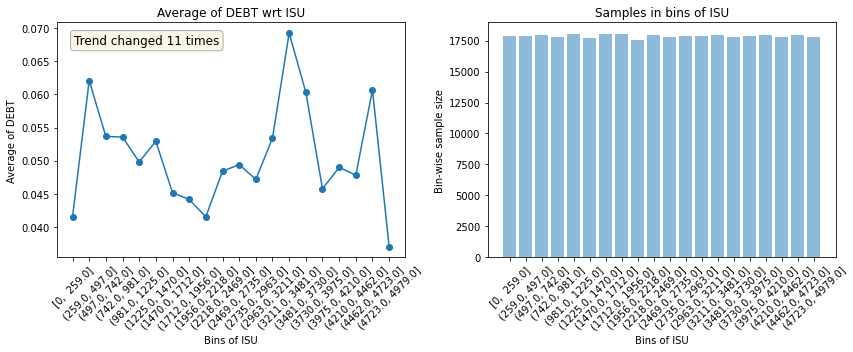

--------------------------------------------------------------------------------------------------------------


                                          Plots for ST_YEAR                                           


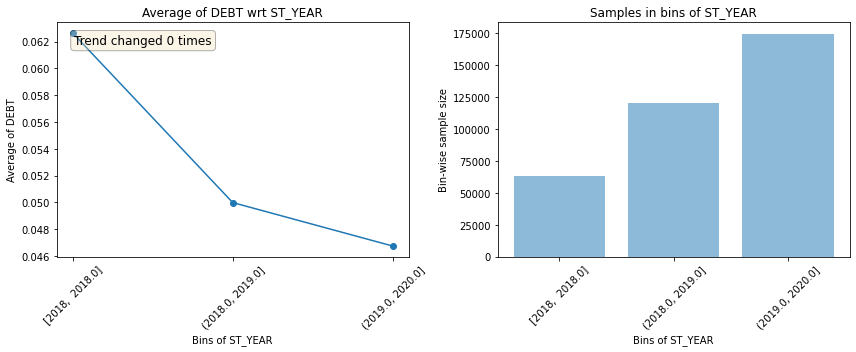

--------------------------------------------------------------------------------------------------------------


                                          Plots for SEMESTER                                          


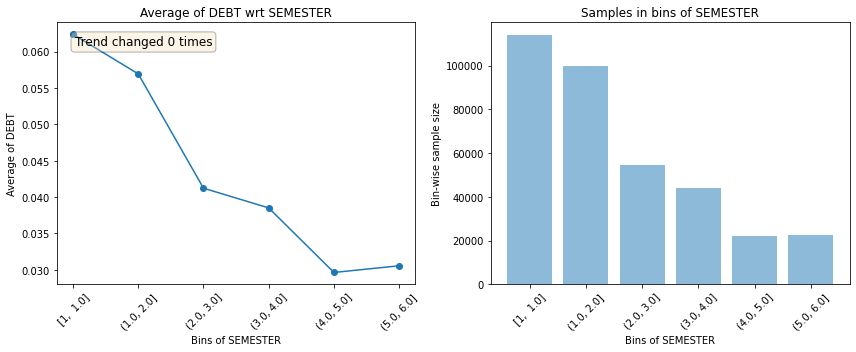

--------------------------------------------------------------------------------------------------------------


                                          Plots for DISC_ID                                           


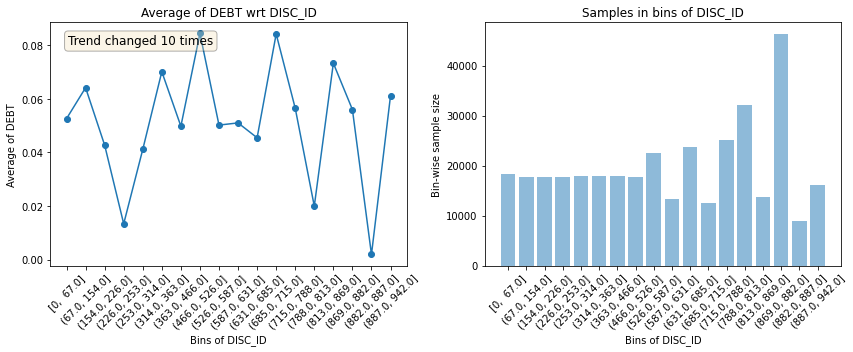

--------------------------------------------------------------------------------------------------------------


                                         Plots for TYPE_NAME                                          


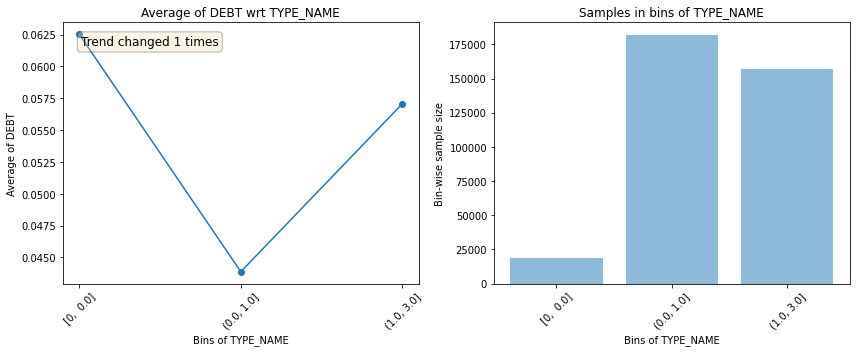

--------------------------------------------------------------------------------------------------------------


                                         Plots for MAIN_PLAN                                          


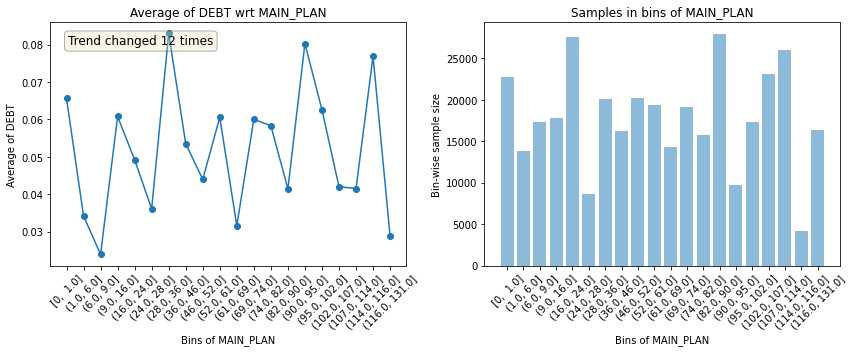

--------------------------------------------------------------------------------------------------------------


                                          Plots for PRED_ID                                           


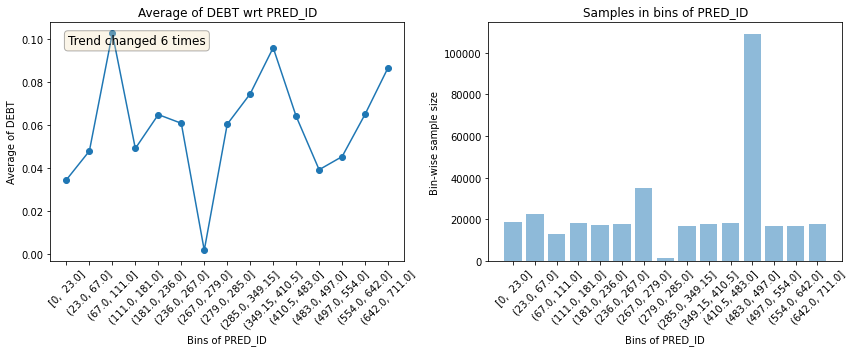

--------------------------------------------------------------------------------------------------------------


                                           Plots for СHOICE                                           


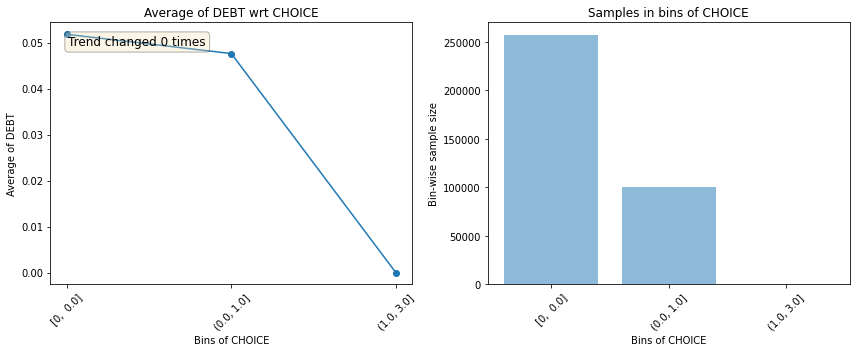

--------------------------------------------------------------------------------------------------------------


                                         Plots for DISC_NAME                                          


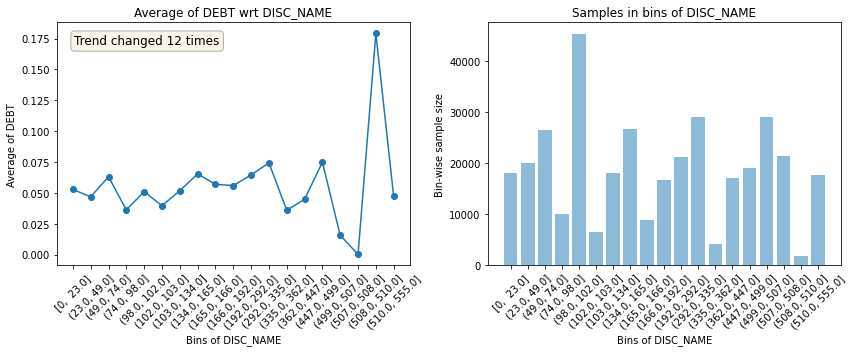

--------------------------------------------------------------------------------------------------------------


                                          Plots for DISC_DEP                                          


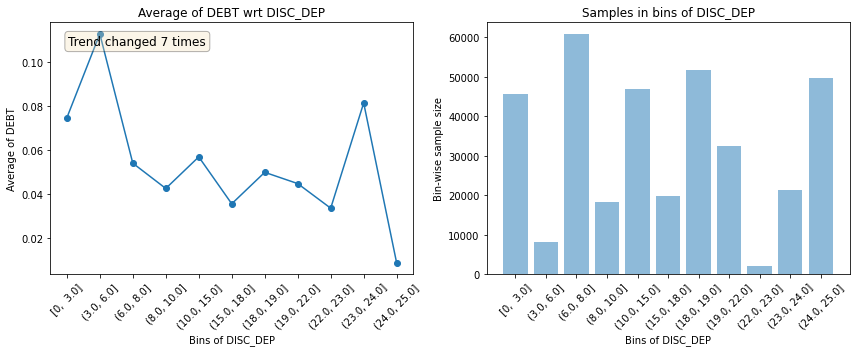

--------------------------------------------------------------------------------------------------------------


                                         Plots for mean_MARK                                          


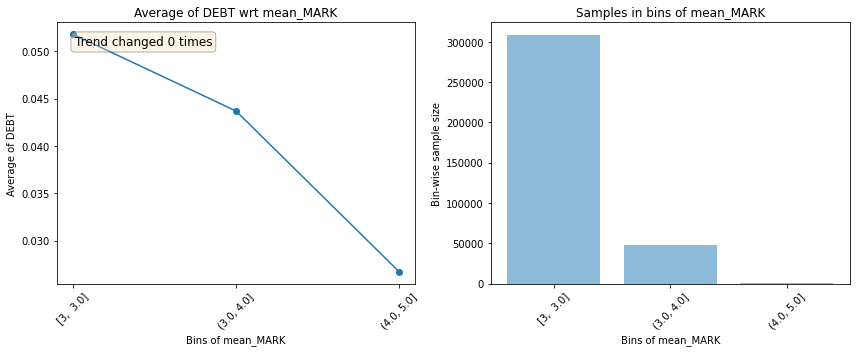

--------------------------------------------------------------------------------------------------------------


                                        Plots for STUD_GENDER                                         


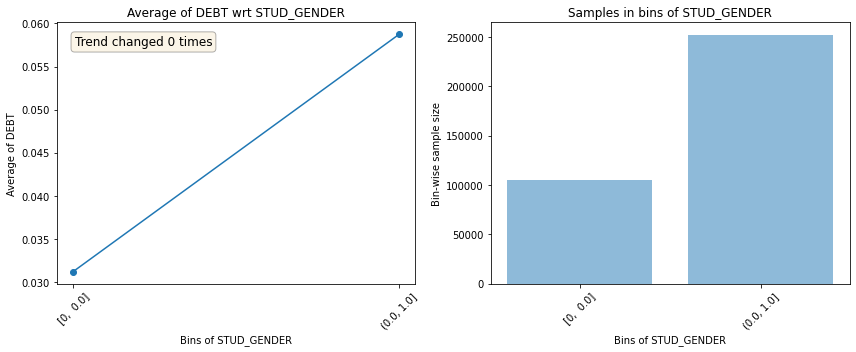

--------------------------------------------------------------------------------------------------------------


                                        Plots for CITIZENSHIP                                         


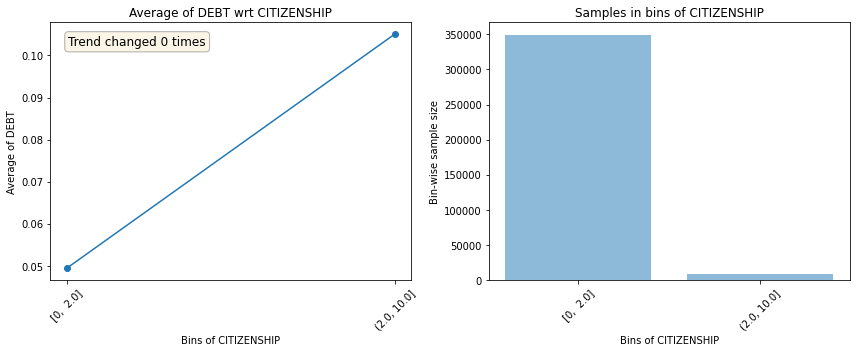

--------------------------------------------------------------------------------------------------------------


                                         Plots for EXAM_TYPE                                          


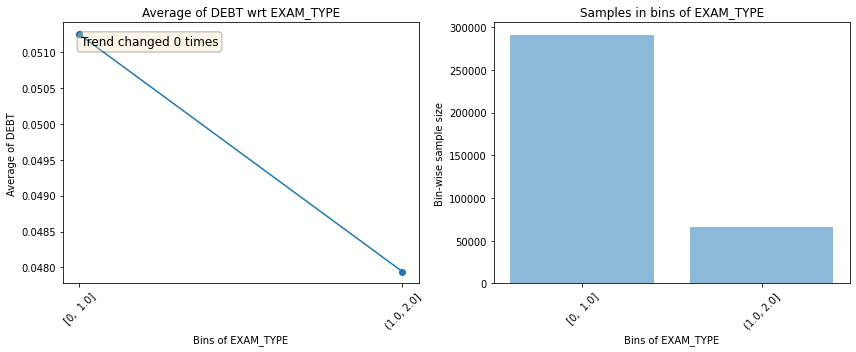

--------------------------------------------------------------------------------------------------------------


                                       Plots for EXAM_SUBJECT_1                                       


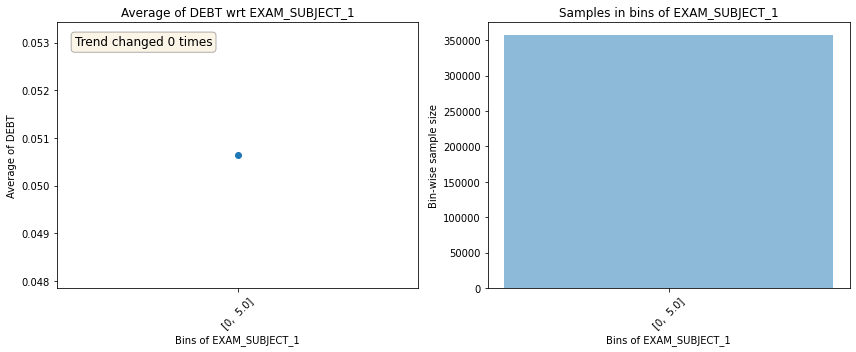

--------------------------------------------------------------------------------------------------------------


                                       Plots for EXAM_SUBJECT_2                                       


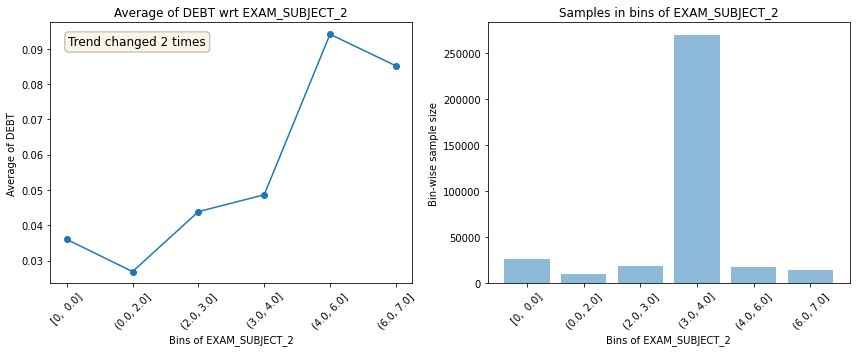

--------------------------------------------------------------------------------------------------------------


                                       Plots for EXAM_SUBJECT_3                                       


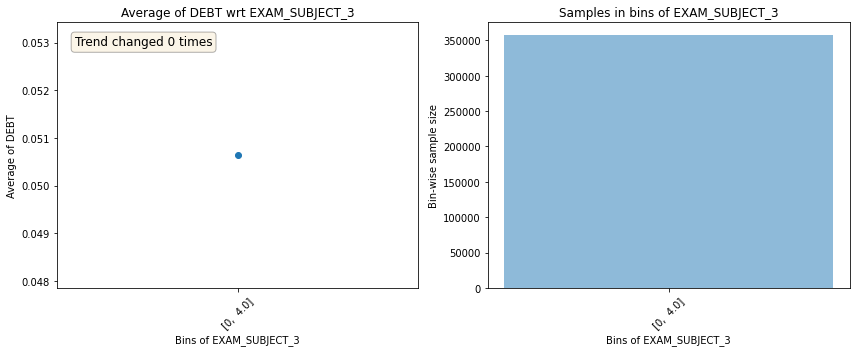

--------------------------------------------------------------------------------------------------------------


                                      Plots for ADMITTED_EXAM_1                                       


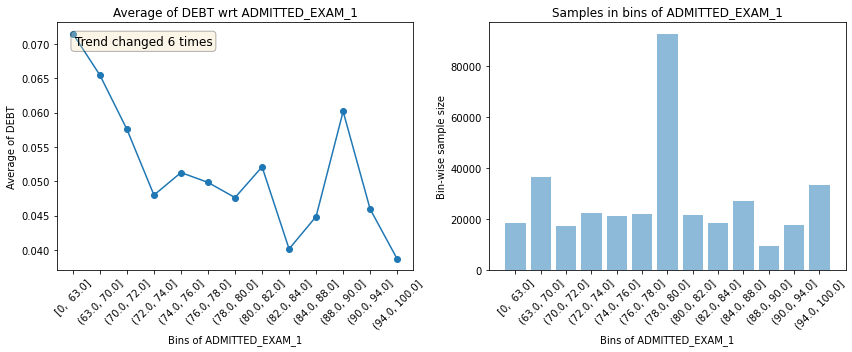

--------------------------------------------------------------------------------------------------------------


                                      Plots for ADMITTED_EXAM_2                                       


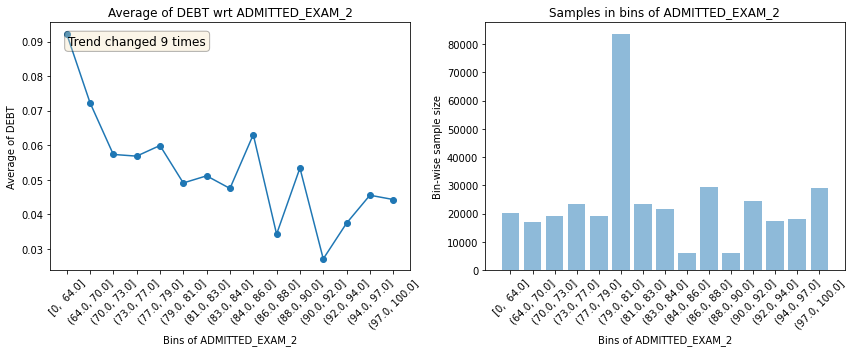

--------------------------------------------------------------------------------------------------------------


                                      Plots for ADMITTED_EXAM_3                                       


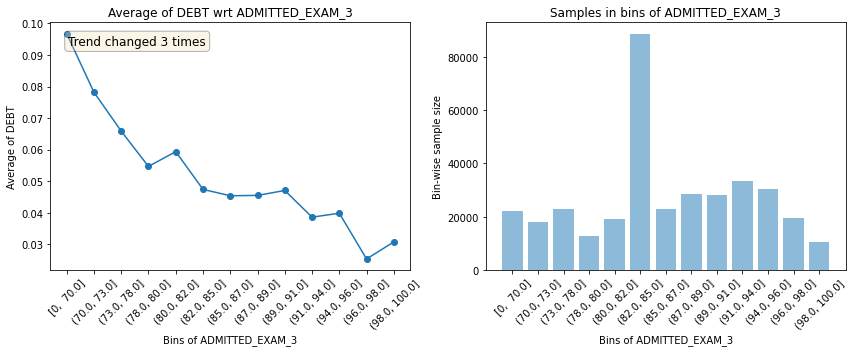

--------------------------------------------------------------------------------------------------------------


                                Plots for ADMITTED_SUBJECT_PRIZE_LEVEL                                


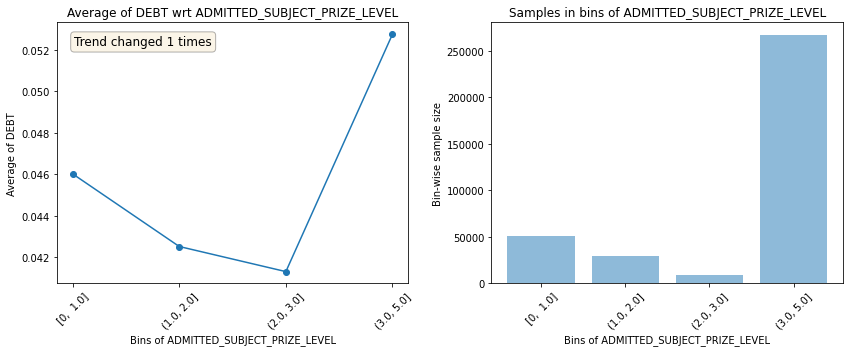

--------------------------------------------------------------------------------------------------------------


                                         Plots for REGION_ID                                          


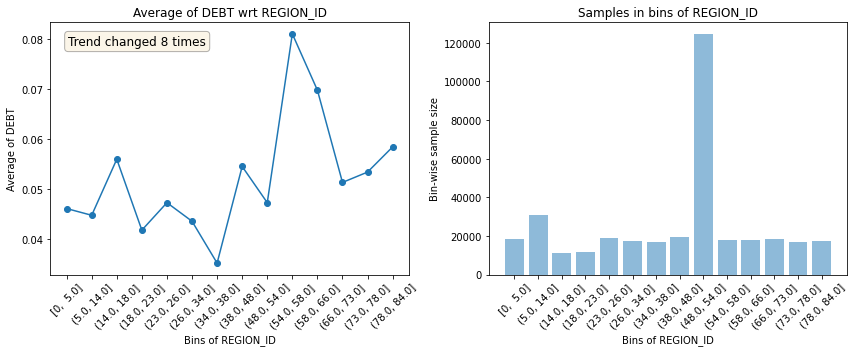

--------------------------------------------------------------------------------------------------------------


                                            Plots for KURS                                            


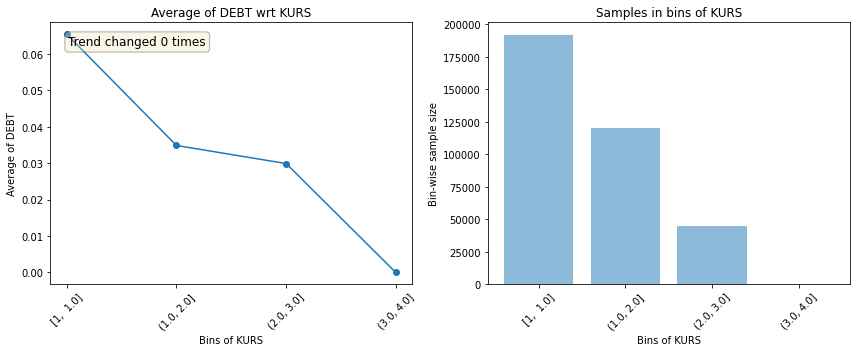

--------------------------------------------------------------------------------------------------------------


                                          Plots for PRIZNAK                                           


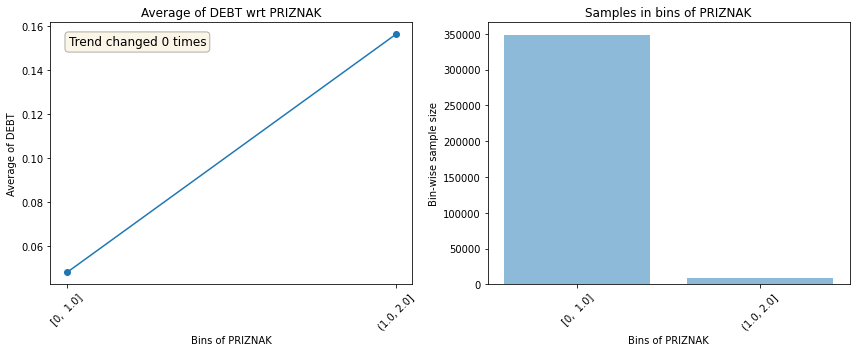

--------------------------------------------------------------------------------------------------------------


                                      Plots for Training_period                                       


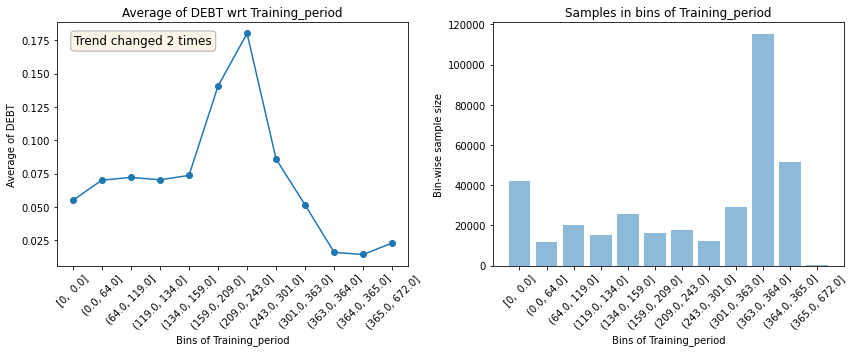

--------------------------------------------------------------------------------------------------------------




In [ ]:
featexp.get_univariate_plots(data =df, target_col='DEBT', bins=20)

Выводы:
1. Задолженность снижается по годам и семестрам.
2. Задолженность у зачетов ниже чем у других испытаний
3. Задолженность зависит от типа образовательной программы. Следует выделить топ таких программ.
4. Есть преподаватели с высоким показателем долгов. Выделить топ таких.
5. Есть дисциплины с высоким уровнем долгов. Возможно есть корреляция с преподавателями.
6. В основном колво долгов у мужчин в 2 раза выше чем у женщин.
7. У поступивших через олимпиаду, долгов меньше.
8. Есть почти линейная зависимость оценки на вст экзамене и значением долгов.
9. Линейная зависимость между Priznak и  задолженностью.
10. Задолженность повышается в период обучения между 150 и 240 днями.

In [ ]:
# топ 10 образовательных программ по задолженности
train.groupby('MAIN_PLAN')['DEBT'].mean().rename('mean_DEBT_MAIN_PLAN').reset_index().sort_values(
    by='mean_DEBT_MAIN_PLAN', ascending=False)[:10]

,MAIN_PLAN,mean_DEBT_MAIN_PLAN
53,16237482972591189123,0.144776
38,14544105490191336277,0.142857
32,13427989591944350593,0.125000
127,9204061482886305576,0.125000
17,11680616703932769893,0.120690
129,931917359419539975,0.119048
100,5283359639739198,0.113785
105,558103341058490976,0.111111
95,4833027042617058934,0.108700
34,1374772077571893125,0.106295


In [ ]:
# топ 10 преподавателей по задолженности
train.groupby('PRED_ID')['DEBT'].mean().rename('mean_DEBT_PRED_ID').reset_index().sort_values(
    by='mean_DEBT_PRED_ID', ascending=False)[:10]

,PRED_ID,mean_DEBT_PRED_ID
522,5723904852287678445,1.000000
449,4108493775262005560,1.000000
526,5850695467742119691,1.000000
7,10153237222217819211,0.944444
590,7417219752543872778,0.750000
261,15613596048609177806,0.666667
358,18085079761308313113,0.666667
365,18212333506497373660,0.625532
579,7198626773642538245,0.541667
9,10193733831761265328,0.538462


In [ ]:
# топ 10 дисциплин по задолженности
train.groupby('DISC_ID')['DEBT'].mean().rename('mean_DEBT_DISC_ID').reset_index().sort_values(
    by='mean_DEBT_DISC_ID', ascending=False)[:10]

,DISC_ID,mean_DEBT_DISC_ID
12,10215669908345220117,1.000000
28,10516844487088060128,1.000000
84,11738185485967372207,0.666667
402,17288548520472227304,0.476190
225,14072545208091511527,0.434783
565,3635937518936503922,0.400000
927,9704108169747506652,0.396280
154,12951760905405314585,0.393324
597,4058534942643762145,0.370370
502,2457165989698439493,0.368421


# Проверка распределения числовых значений

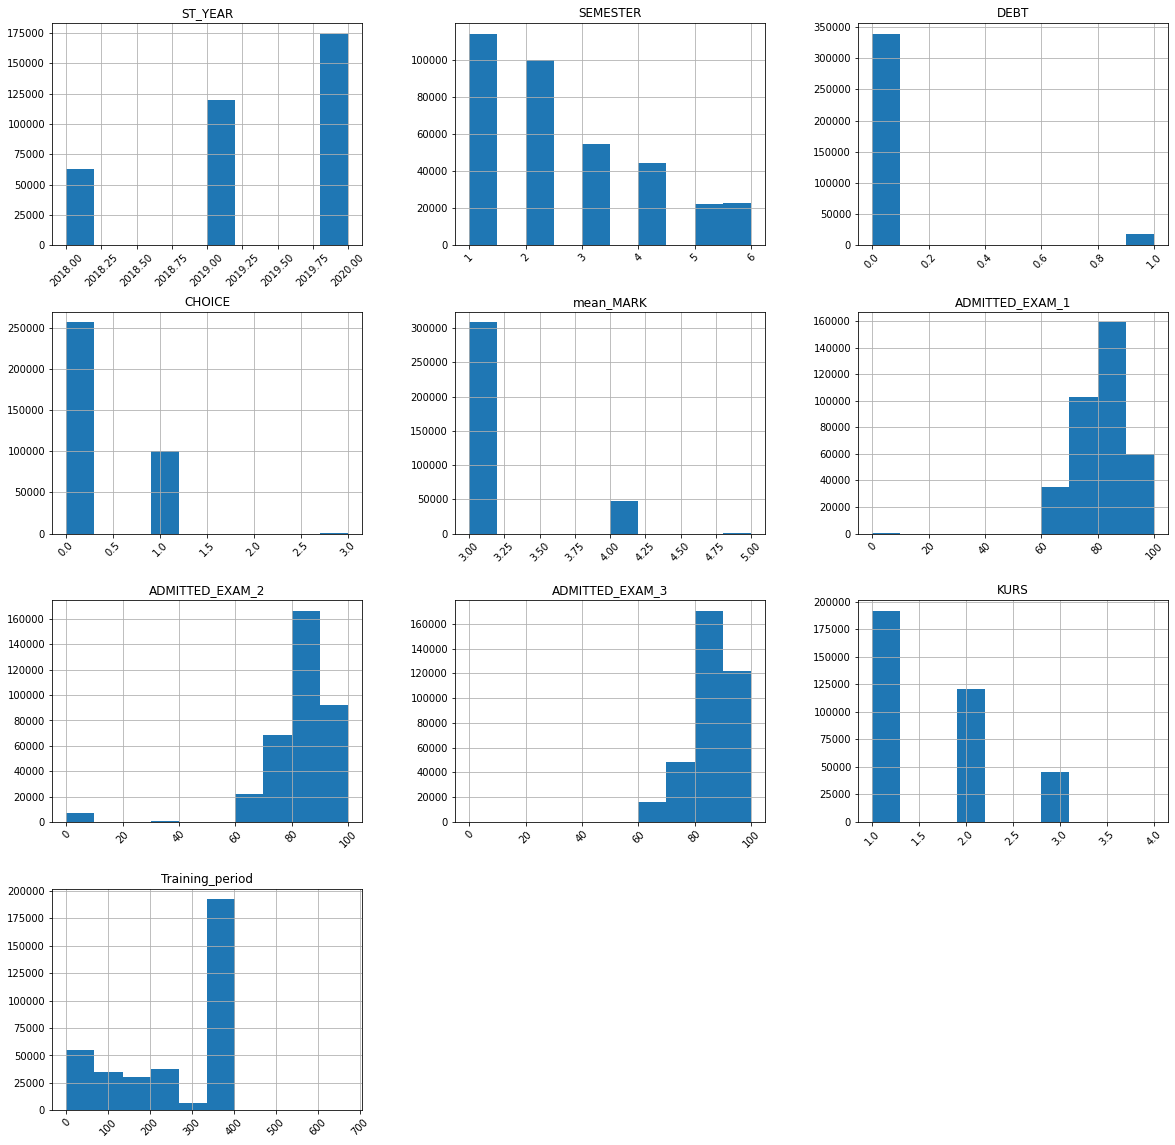

In [ ]:
# посмотрим как распределены числовые данные
train.hist(figsize=(20,20), xrot=45);

Числовые данные распределены не нормально. У некоторых признаков высокий дисбаллас значений обьектов по их количеству.

# Проверка распределения категориальных данных

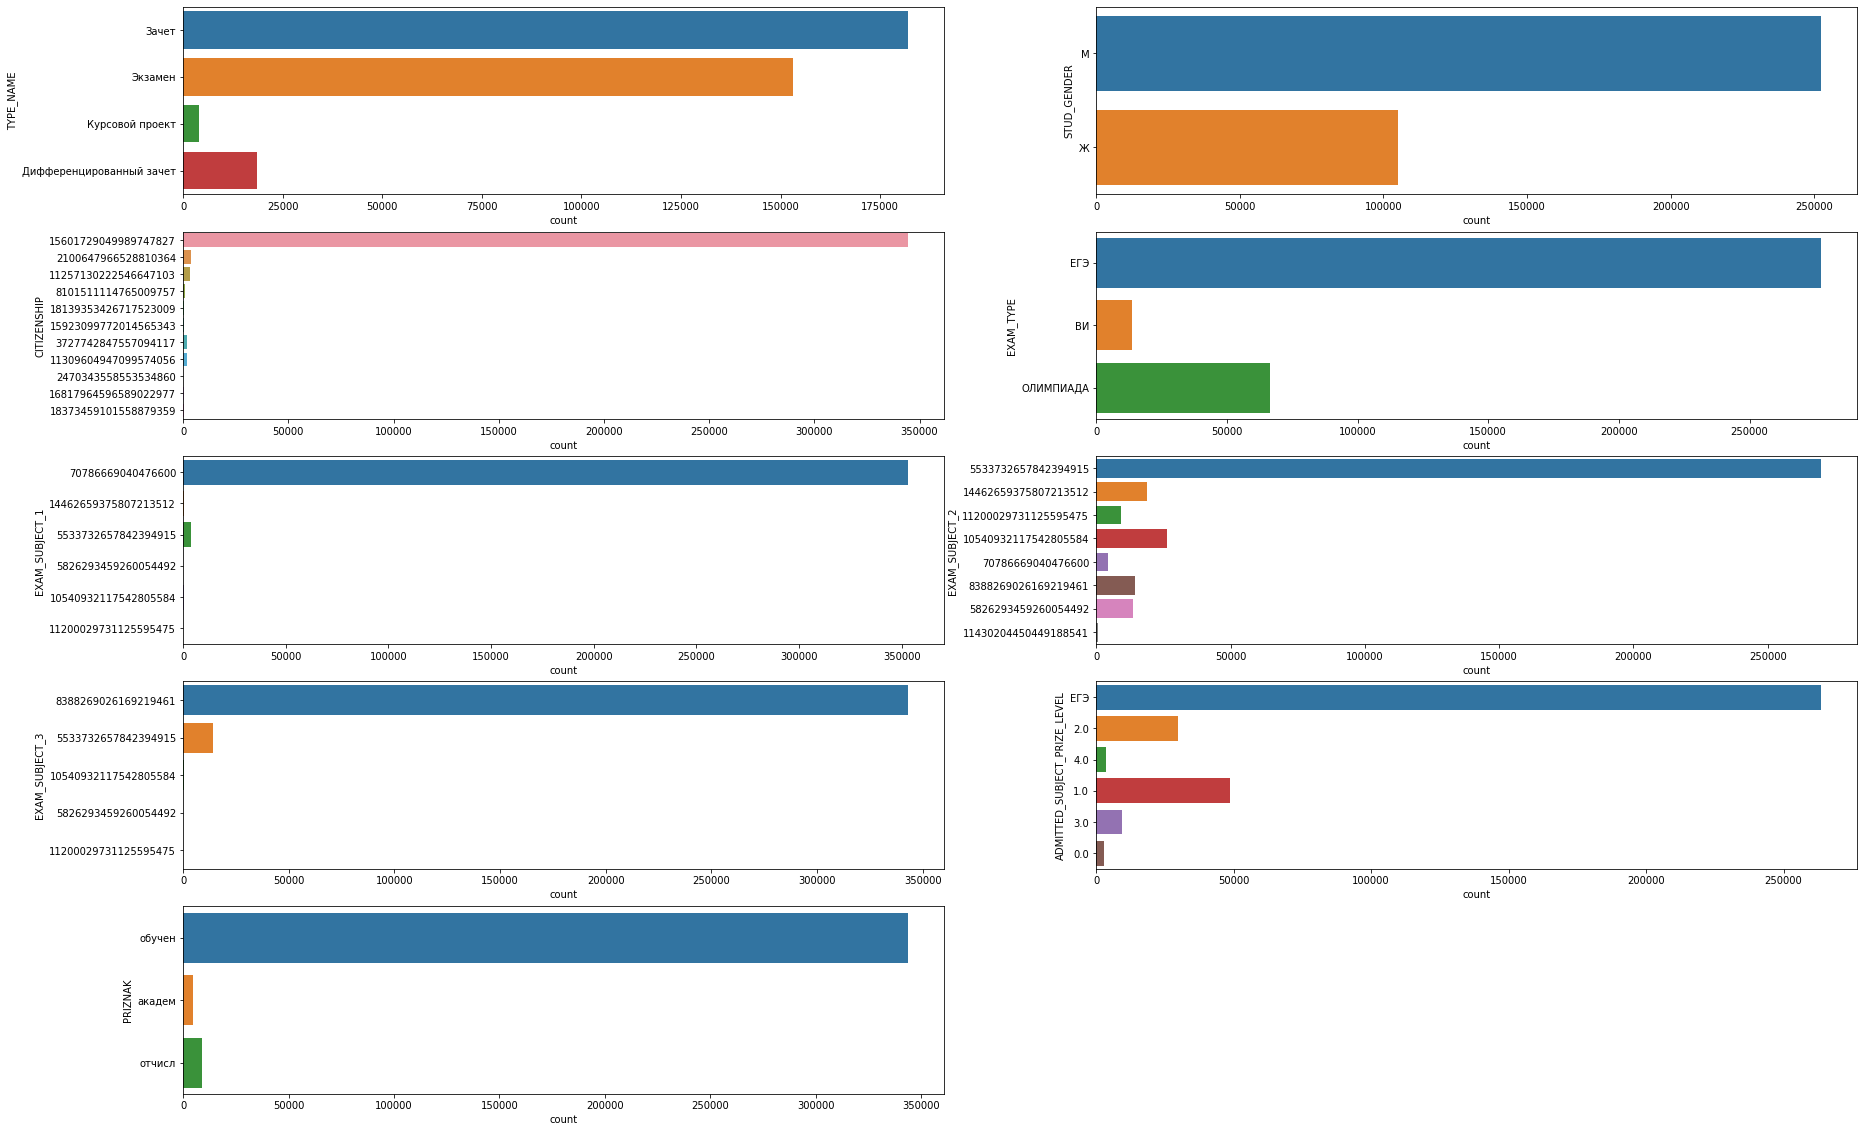

In [ ]:
# посмотрим как распределены категориальные данные. Возьмем те, у которых колво уникальных значений
# меньше 20
plt.figure(figsize=(30,20))
i = 1

for col in train.select_dtypes(include='object'):
    if train[col].nunique() <= 20:
      plt.subplot(5, 2, i)
      i+=1
      sns.countplot(y=col, data=train);

В целом мы не видим дублей у обозначений классов. Присутствуют признаки с очень малым количеством значений, возможно это может повлиять на производительность модели

# Распределение числовых значений между классами

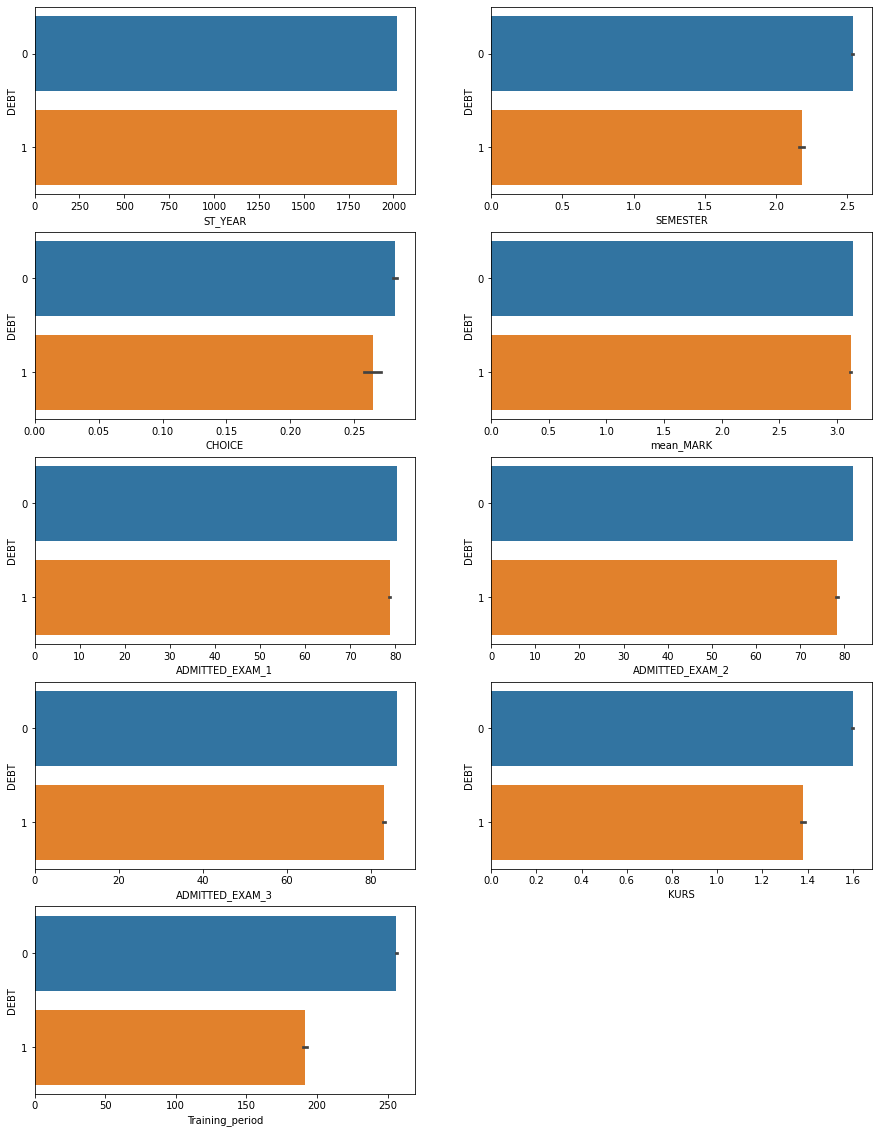

In [ ]:
# разделим данные по целевой функции и посмотрим, как числовые характеристики распределяются между
# классами
plt.figure(figsize=(15,20))
i = 1
for col in train.select_dtypes(exclude='object').drop('DEBT', axis=1):
    plt.subplot(5, 2, i)
    i+=1
    sns.barplot(y = train['DEBT'].astype('category'), x = col, data=train);


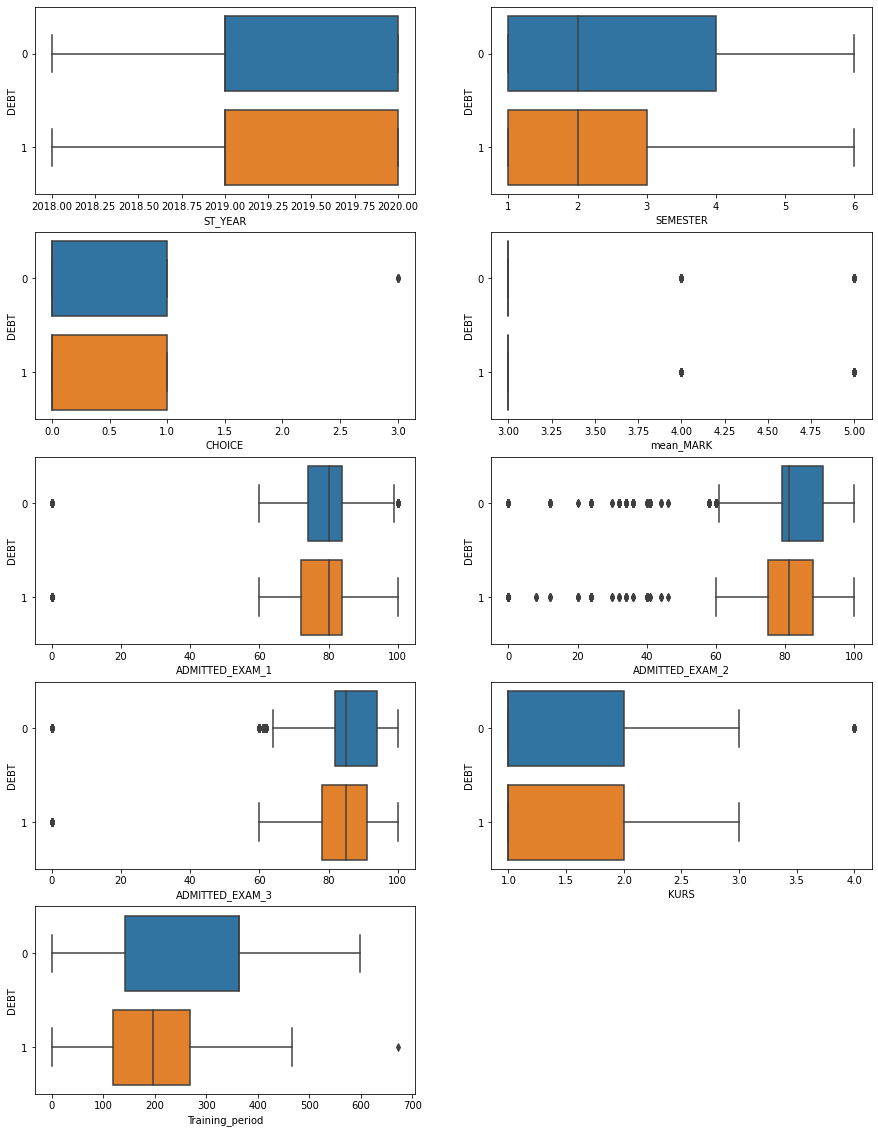

In [ ]:
# просто для сравнения информативности графиков
plt.figure(figsize=(15,20))
i = 1
for col in train.select_dtypes(exclude='object').drop('DEBT', axis=1):
    plt.subplot(5, 2, i)
    i+=1
    sns.boxplot(y = train['DEBT'].astype('category'), x = col, data=train);

Потенциально признаки семестр, результаты экзаменов и время обучения могут стать неплохими предикторами для модели так как имеют разное распределение по таргету

# Распределение категориальных признаков в разрезе таргета

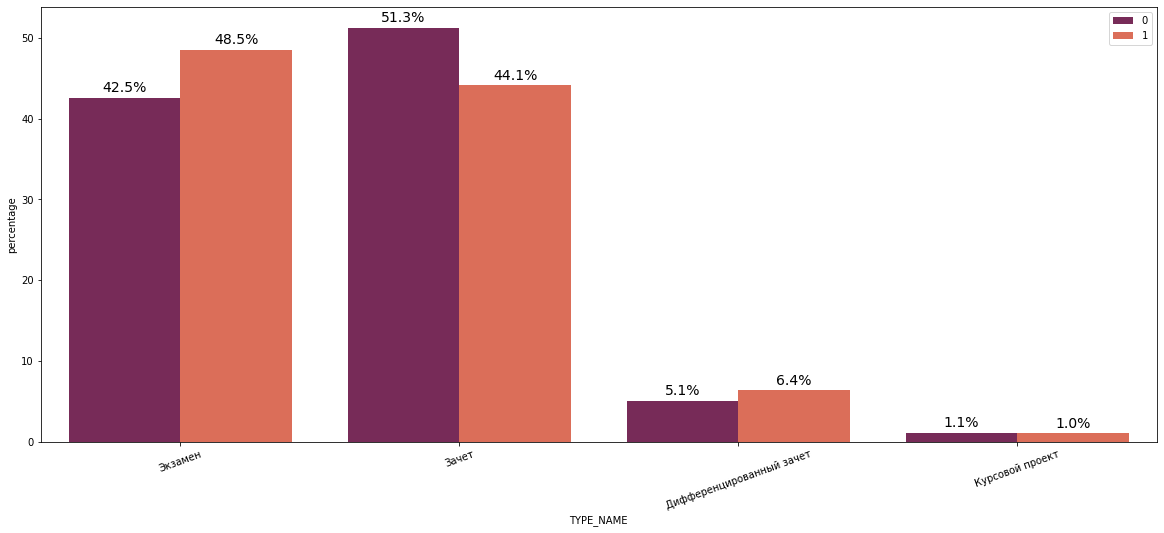

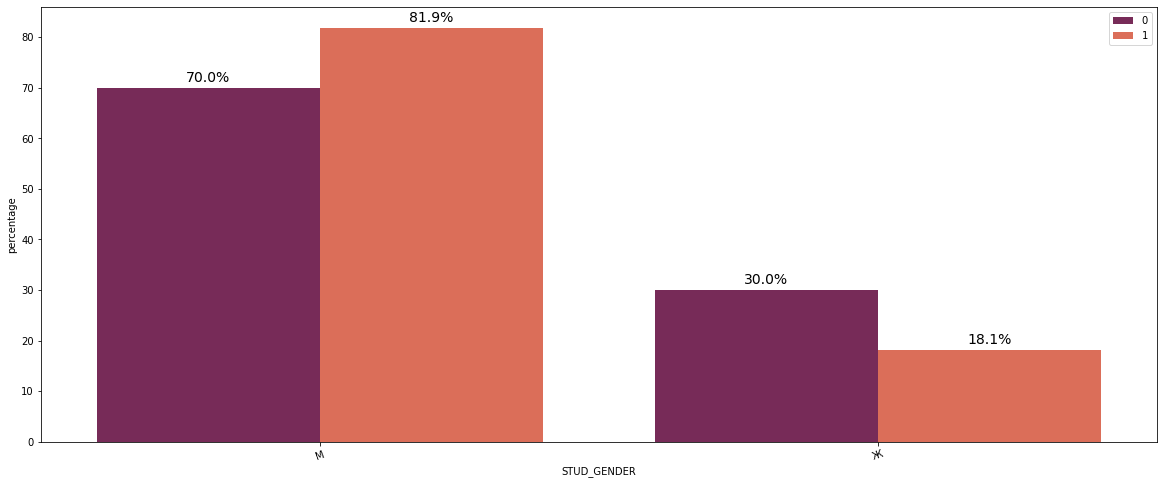

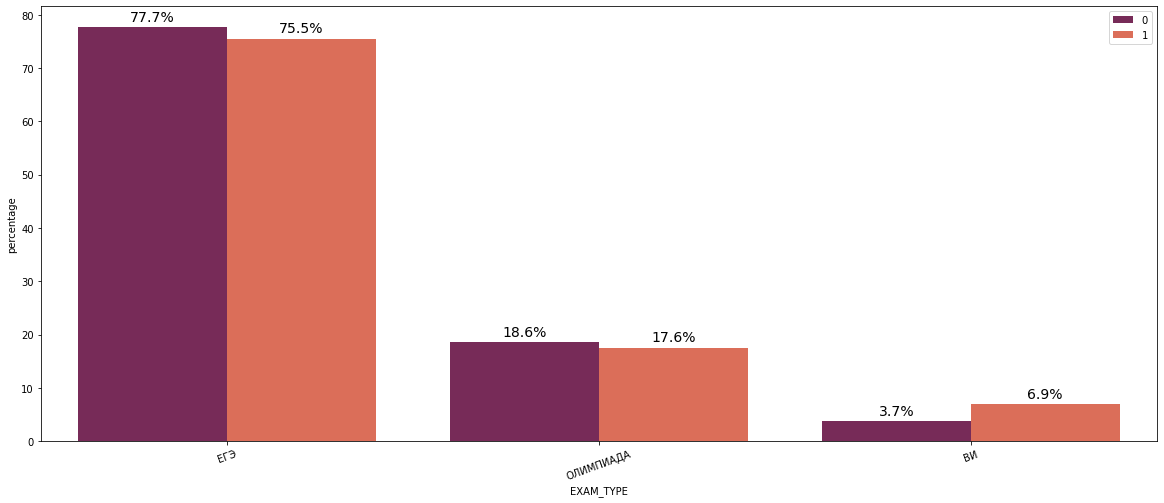

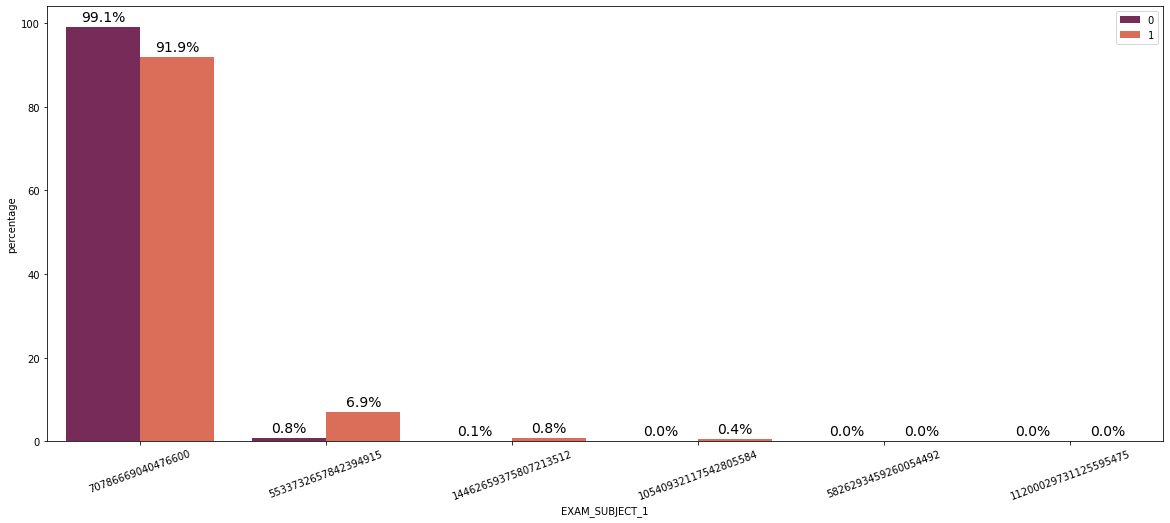

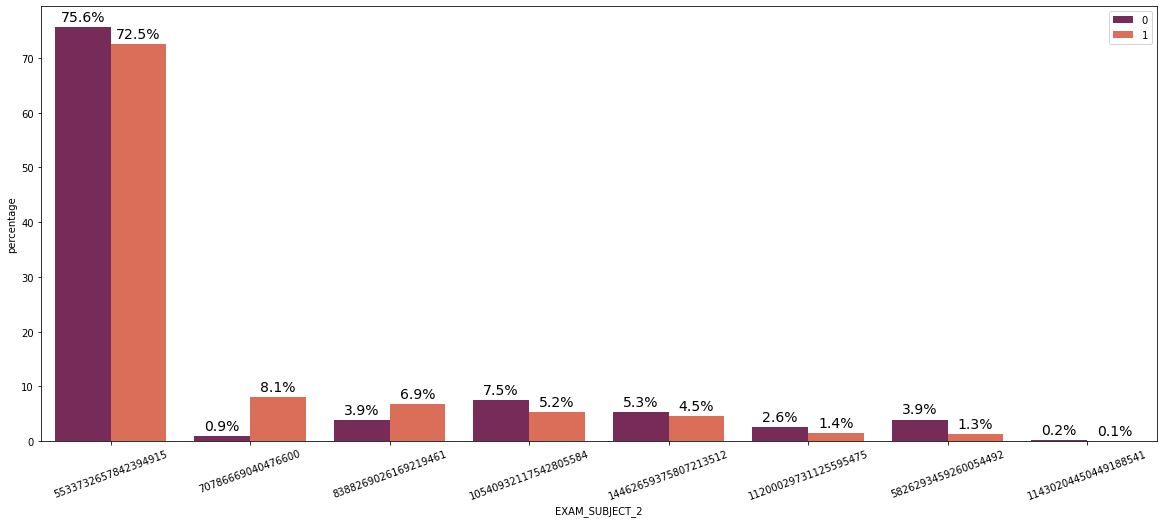

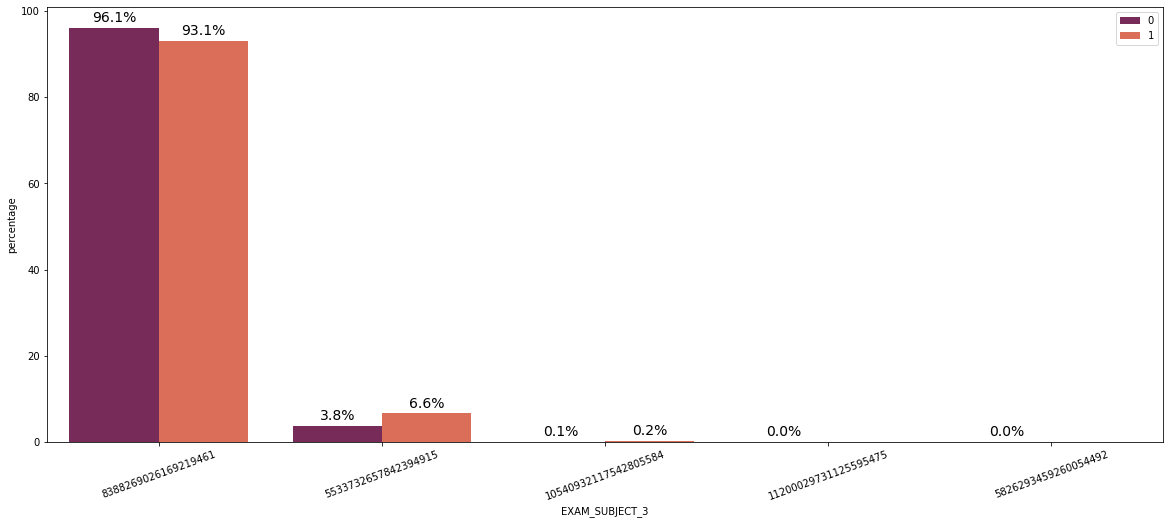

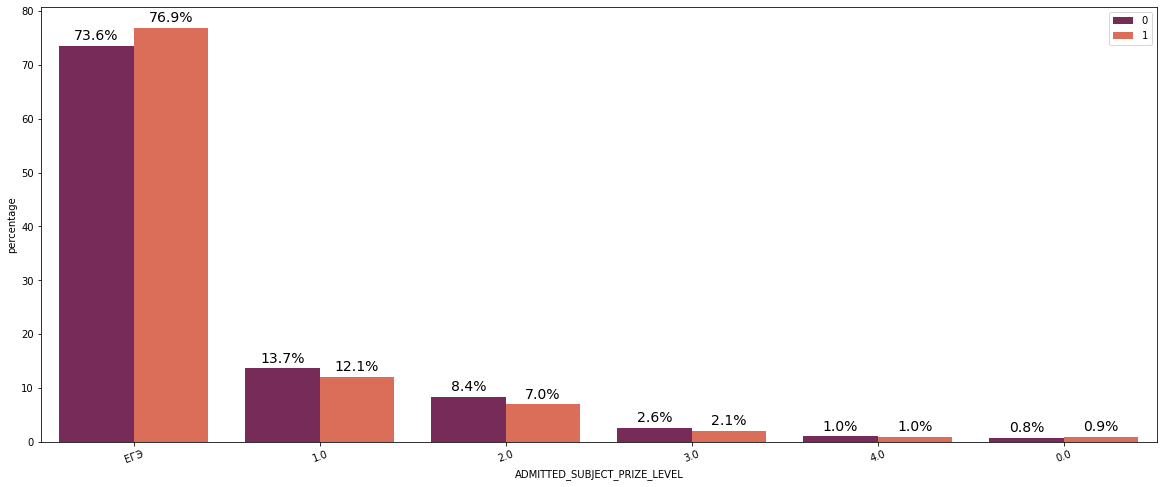

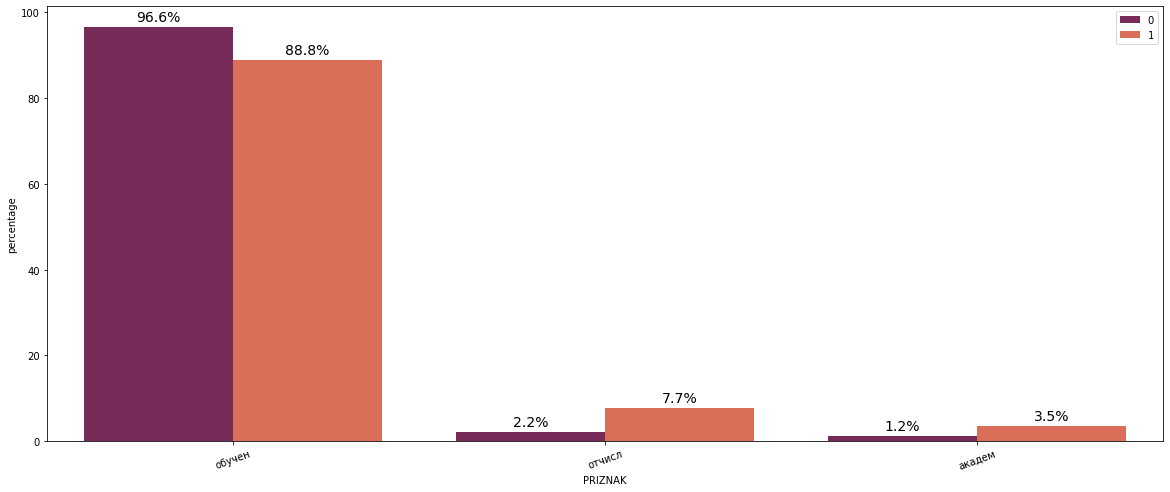

In [ ]:
# посмотрим как категориальные признаки распределены в разрезе таргета
for col in train.select_dtypes(include='object'):
  if train[col].nunique() <= 10:
    methods.bar_plot_group(data=train, x=col, y='DEBT')

Можно заметить, что признаки TypeName, STUD_GENDER, EXAM_SUBJECT, ADMITTED_SUBJECT_PRIZE_LEVEL, Priznak  меняются в зависимости от цели. Они могут стать неплохими предикторами.

[]

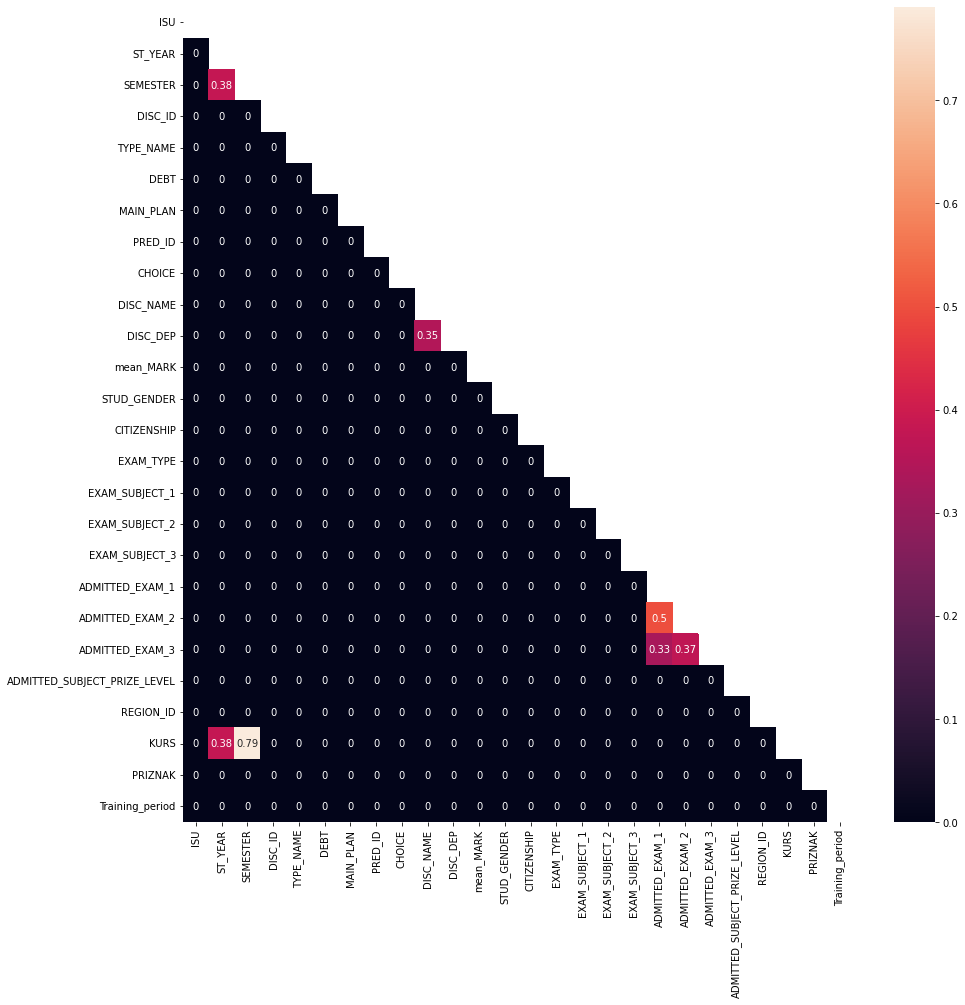

In [ ]:
# посмотрим на коррелляцию признаков
methods.correlation_features_to_drop(df, 'spearman', 0.3, 0.8, (15,15), True)

У нас нет сильно коррелирующих признаков

In [ ]:
train_data = train.copy()

In [ ]:
# Удалим колонки с большим колвом уникальных значений категориальных признаков, коррелирующие
# и мало информативные признаки.
train_data.drop(['ISU', 
                 'DISC_ID', 
                 'MAIN_PLAN', 
                 'PRED_ID', 
                 'DISC_NAME',
                 'mean_MARK'], axis=1, inplace=True)

In [ ]:
train_data[:3]

,ST_YEAR,SEMESTER,TYPE_NAME,DEBT,СHOICE,DISC_DEP,STUD_GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_EXAM_1,ADMITTED_EXAM_2,ADMITTED_EXAM_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID,KURS,PRIZNAK,Training_period
0,2020,1,Зачет,0,0,5077682191738720383,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65
1,2020,1,Зачет,0,0,5077682191738720383,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,академ,298
2,2020,1,Зачет,0,0,8139328495281102994,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,78,79,91,ЕГЭ,7805492244297918082,2,обучен,65


In [ ]:
train_data.describe(include='object')

,TYPE_NAME,DISC_DEP,STUD_GENDER,CITIZENSHIP,EXAM_TYPE,EXAM_SUBJECT_1,EXAM_SUBJECT_2,EXAM_SUBJECT_3,ADMITTED_SUBJECT_PRIZE_LEVEL,REGION_ID,PRIZNAK
count,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448,357448
unique,4,26,2,11,3,6,8,5,6,85,3
top,Зачет,16131140458546037814,М,15601729049989747827,ЕГЭ,70786669040476600,5533732657842394915,8388269026169219461,ЕГЭ,4877310761925081124,обучен
freq,181941,56360,252297,344426,277269,352976,269774,342879,263553,116669,343736


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357448 entries, 0 to 357447
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   ST_YEAR                       357448 non-null  int16 
 1   SEMESTER                      357448 non-null  int16 
 2   TYPE_NAME                     357448 non-null  object
 3   DEBT                          357448 non-null  int16 
 4   СHOICE                        357448 non-null  int16 
 5   DISC_DEP                      357448 non-null  object
 6   STUD_GENDER                   357448 non-null  object
 7   CITIZENSHIP                   357448 non-null  object
 8   EXAM_TYPE                     357448 non-null  object
 9   EXAM_SUBJECT_1                357448 non-null  object
 10  EXAM_SUBJECT_2                357448 non-null  object
 11  EXAM_SUBJECT_3                357448 non-null  object
 12  ADMITTED_EXAM_1               357448 non-null  int16 
 13 

# Save data

In [ ]:
feather.write_feather(
    train_data, '/content/drive/MyDrive/Colab Notebooks/Pet_project/Processed data/df.feather')